Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Take a look at the data

In [2]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Let's see how many different countries are in the dataset and what years the data are from.

In [3]:
list_of_countries = df.Country.unique()
print(list_of_countries)
print(df.Year.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


Let's see how these countries' life expectancy and GDP have changed over time.

In [4]:
def plotTimeLine(df, country):
    df_country = df[df.Country == country]
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(country)
    ax1.plot(df_country['Year'], df_country['Life expectancy at birth (years)'])
    ax1.set_title('Life expectancy')
    ax2.plot(df_country['Year'], df_country['GDP'])
    ax2.set_title('GDP')

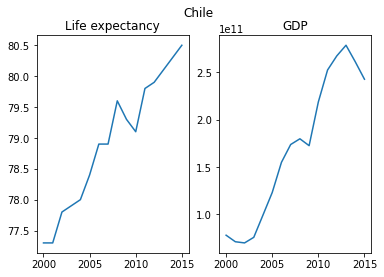

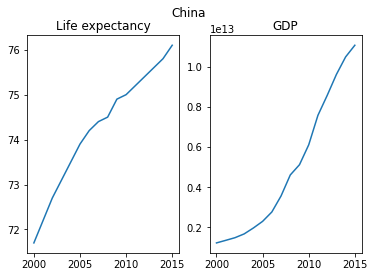

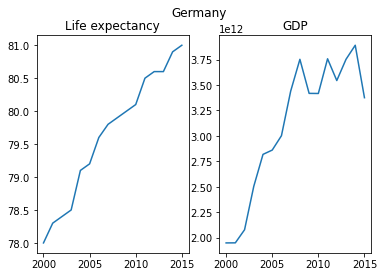

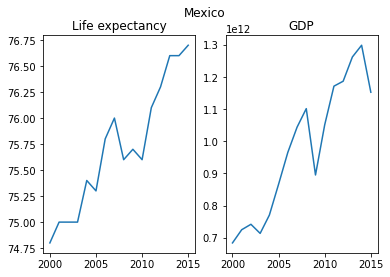

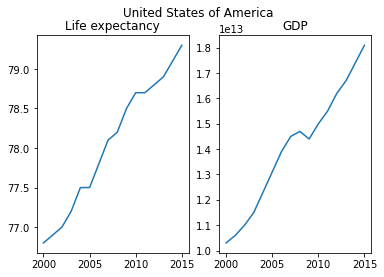

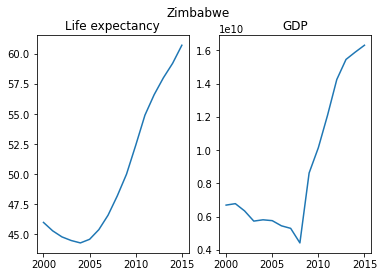

In [5]:
for country in list_of_countries:
    plotTimeLine(df, country)

It's clear from the data that, for these countries in the dataset, both the life expectancy and GDP tend to be increasing over time. There are some dips that are visible in both variables, indicating that they could be correlated.
Now I'll make a scatter plot to see the relationship between GDP and life expectancy. I'll distinguish the countries by hue.

<AxesSubplot:xlabel='GDP', ylabel='Life expectancy at birth (years)'>

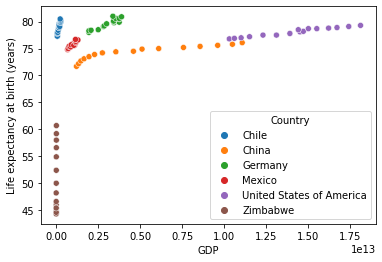

In [6]:
sns.scatterplot(x='GDP', y='Life expectancy at birth (years)', data=df, hue='Country')

It looks like all the points for Zimbabwe have no GDP. We know that Zimbabwe does have a non-zero GDP, but it's so small compared to the larger countries that it looks like zero on the plot. If I want to see it better I should probably use a log scale for GDP.

<AxesSubplot:xlabel='logGDP', ylabel='Life expectancy at birth (years)'>

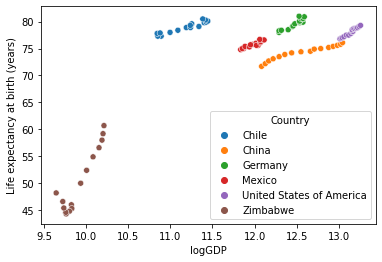

In [7]:
df['logGDP'] = np.log10(df['GDP'])
sns.scatterplot(x='logGDP', y='Life expectancy at birth (years)', data=df, hue='Country')

Clearly, we can't predict life expectancy from GDP alone and vice versa. There are many variables involved that are specific to each country that we don't have access to. One of those variables in the population. It would make more sense to use GDP per capita to compare between countries with different populations. I will extract the population information from the internet and find the GDP per capita.

Instead of adding in the population by hand, year by year, for each country, I'll just use the population in 2000 and the population in 2015 as endpoints of a linear function that estimates the population for each year. This will be much less tedious, and should be okay since the population estimates are not exact anyway. The numbers were taken from https://www.worldometers.info/population/

In [8]:
#Chile
Chile_pop_2000 = 15342353
Chile_pop_2015 = 17969353
#China
China_pop_2000 = 1290550765
China_pop_2015 = 1406847870
#Germany
Germany_pop_2000 = 81400882
Germany_pop_2015 = 81787411
#Mexico
Mexico_pop_2000 = 98899845
Mexico_pop_2015 = 121858258
#USA
USA_pop_2000 = 281710909
USA_pop_2015 = 320878310
#Zimbabwe
Zimbabwe_pop_2000 = 11881477
Zimbabwe_pop_2015 = 13814629

pops_2000 = [Chile_pop_2000, China_pop_2000, Germany_pop_2000, Mexico_pop_2000, USA_pop_2000, Zimbabwe_pop_2000]
pops_2015 = [Chile_pop_2015, China_pop_2015, Germany_pop_2015, Mexico_pop_2015, USA_pop_2000, Zimbabwe_pop_2015]

In [9]:
def getGDPperCapita(country, year, GDP):
    index = list_of_countries.tolist().index(country)
    pop_2000 = pops_2000[index]
    pop_2015 = pops_2015[index]
    pop_thisyear = pop_2000 + (pop_2015-pop_2000)/15 * (year-2000)
    GDPperCapita = GDP/pop_thisyear
    return GDPperCapita

In [10]:
df['GDPperCapita'] = df.apply(lambda row : getGDPperCapita(row['Country'], row['Year'], row['GDP']), axis = 1)
df.head(10)

,Country,Year,Life expectancy at birth (years),GDP,logGDP,GDPperCapita
0,Chile,2000,77.3,7.786093e+10,10.891320,5074.901624
1,Chile,2001,77.3,7.097992e+10,10.851136,4574.189558
2,Chile,2002,77.8,6.973681e+10,10.843462,4443.924145
3,Chile,2003,77.9,7.564346e+10,10.878771,4767.118561
4,Chile,2004,78.0,9.921039e+10,10.996557,6184.073788
5,Chile,2005,78.4,1.229650e+11,11.089782,7581.998452
6,Chile,2006,78.9,1.547880e+11,11.189737,9442.234816
7,Chile,2007,78.9,1.736060e+11,11.239565,10478.210993
8,Chile,2008,79.6,1.796380e+11,11.254398,10728.871615
9,Chile,2009,79.3,1.723890e+11,11.236510,10189.346571


Now we can make a plot of Life Expectancy versus GDP per capita.

<AxesSubplot:xlabel='GDPperCapita', ylabel='Life expectancy at birth (years)'>

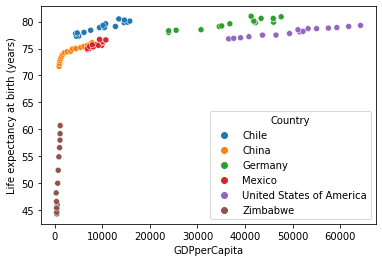

In [11]:
sns.scatterplot(x='GDPperCapita', y='Life expectancy at birth (years)', data=df, hue='Country')

I'm beginning to see similarities in all the countries. Although the life expectancy isn't exactly the same in each country, it looks like the slope of life expectancy versus GDP per capita is about the same for any country at any given value of GDP per capita. I can check that by fitting a line to each country and extracting the slope.

However, given the known values of life expectancy and GDP, we might be able to see how a small change in GDP affects the given life expectancy. I'll plot the increase in life expectancy versus the increase in GDP from year to year.

In [12]:
df_Chile = df[df.Country == 'Chile']
df_China = df[df.Country == 'China']
df_Germany = df[df.Country == 'Germany']
df_Mexico = df[df.Country == 'Mexico']
df_USA = df[df.Country == 'United States of America']
df_Zimbabwe = df[df.Country == 'Zimbabwe']
dfs_countries = [df_Chile, df_China, df_Germany, df_Mexico, df_USA, df_Zimbabwe]

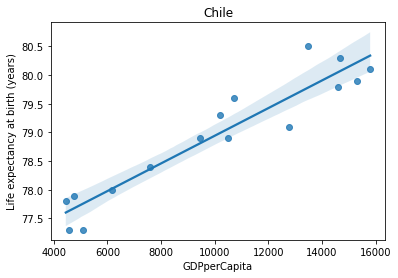

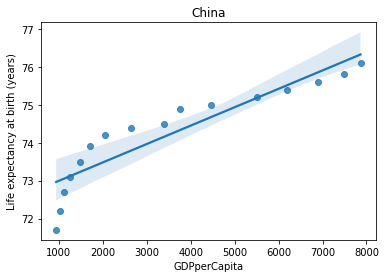

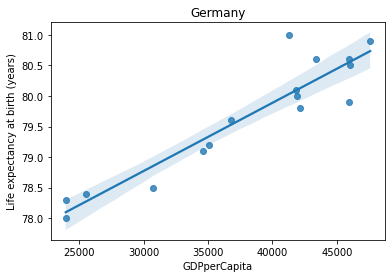

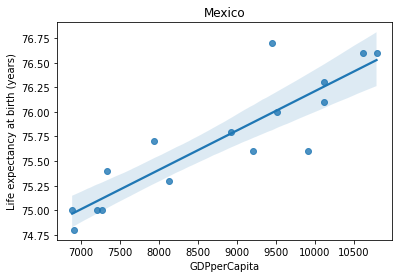

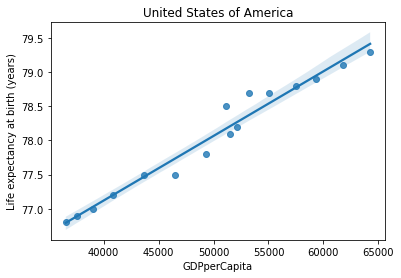

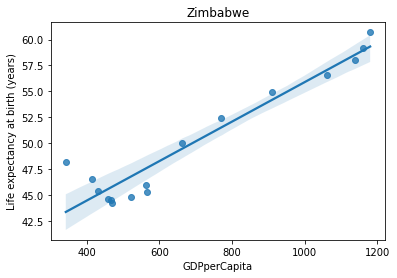

slope = 0.00024091729672453472 in Chile
slope = 0.0004851422251506179 in China
slope = 0.0001116327831504407 in Germany
slope = 0.000400615733555227 in Mexico
slope = 9.464940701729191e-05 in United States of America
slope = 0.019003617563901513 in Zimbabwe


In [13]:
slopes = [0, 0, 0, 0, 0, 0]
intercepts = [0, 0, 0, 0, 0, 0]

for i in range(len(dfs_countries)):
    df_country = dfs_countries[i]
    plt.clf()
    sns.regplot(x='GDPperCapita', y='Life expectancy at birth (years)', data=df_country)
    slopes[i], intercepts[i] = np.polyfit(df_country['GDPperCapita'], df_country['Life expectancy at birth (years)'], 1)
    plt.title(list_of_countries[i])
    plt.show()
    
for i in range(len(slopes)):
    print("slope = {} in {}".format(slopes[i], list_of_countries[i]))

I would like to plot just the slope from point to point for each country all on the same plot. I have a feeling that it will look really nice. This next cell gets the differences in GDP per capita and life expectancy at each step.

In [14]:
for df_country in dfs_countries:
    df_country['diffGDPperCapita'] = df_country['GDPperCapita'].diff()
    df_country['diffLifeExpectancy'] = df_country['Life expectancy at birth (years)'].diff()
df_diffs = pd.concat(dfs_countries)
df_diffs.head()

/home/jared/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jared/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Country,Year,Life expectancy at birth (years),GDP,logGDP,GDPperCapita,diffGDPperCapita,diffLifeExpectancy
0,Chile,2000,77.3,7.786093e+10,10.891320,5074.901624,NaN,NaN
1,Chile,2001,77.3,7.097992e+10,10.851136,4574.189558,-500.712065,0.0
2,Chile,2002,77.8,6.973681e+10,10.843462,4443.924145,-130.265413,0.5
3,Chile,2003,77.9,7.564346e+10,10.878771,4767.118561,323.194416,0.1
4,Chile,2004,78.0,9.921039e+10,10.996557,6184.073788,1416.955227,0.1


Now we get the slope with a simple lambda function.

In [15]:
getslope = lambda row: row['diffLifeExpectancy']/row['diffGDPperCapita']
df_diffs['slope'] = df_diffs.apply(getslope, axis=1)
df_diffs.head()

,Country,Year,Life expectancy at birth (years),GDP,logGDP,GDPperCapita,diffGDPperCapita,diffLifeExpectancy,slope
0,Chile,2000,77.3,7.786093e+10,10.891320,5074.901624,NaN,NaN,NaN
1,Chile,2001,77.3,7.097992e+10,10.851136,4574.189558,-500.712065,0.0,-0.000000
2,Chile,2002,77.8,6.973681e+10,10.843462,4443.924145,-130.265413,0.5,-0.003838
3,Chile,2003,77.9,7.564346e+10,10.878771,4767.118561,323.194416,0.1,0.000309
4,Chile,2004,78.0,9.921039e+10,10.996557,6184.073788,1416.955227,0.1,0.000071


Now we can make the plot of slope versus GDP per capita.

<AxesSubplot:xlabel='GDPperCapita', ylabel='slope'>

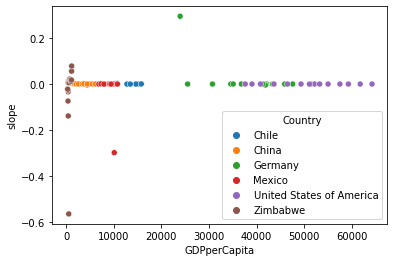

In [16]:
sns.scatterplot(x='GDPperCapita', y='slope', data=df_diffs, hue='Country')

Almost all of the points lie near zero on this plot, but it's probably just because we have outliers that are not allowing us to see the details. I'll restrict the data to slopes with a magnitude less than 0.02 and make a new plot.

<AxesSubplot:xlabel='GDPperCapita', ylabel='slope'>

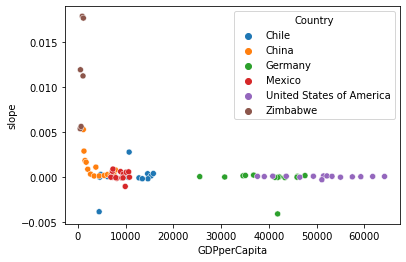

In [17]:
df_diffs_restricted = df_diffs[abs(df_diffs['slope']) < 0.02].dropna()
df_diffs_restricted.head()
sns.scatterplot(x='GDPperCapita', y='slope', data=df_diffs_restricted, hue='Country')

These points definitely all lie along the same curve. It looks almost like a 1/x curve. Let's do a log-log plot to see if we get a straight line that we can easily fit. But, if we're going to take a log, we better make sure that we don't include any negative or zero values.

In [18]:
df_diffs_nonzero = df_diffs_restricted[df_diffs_restricted['slope'] > 0.0]
print(df_diffs_nonzero)

                     Country  Year  Life expectancy at birth (years)  \
3                      Chile  2003                              77.9   
4                      Chile  2004                              78.0   
5                      Chile  2005                              78.4   
6                      Chile  2006                              78.9   
8                      Chile  2008                              79.6   
9                      Chile  2009                              79.3   
11                     Chile  2011                              79.8   
12                     Chile  2012                              79.9   
13                     Chile  2013                              80.1   
17                     China  2001                              72.2   
18                     China  2002                              72.7   
19                     China  2003                              73.1   
20                     China  2004                              

/home/jared/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jared/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='LogGDPperCapita', ylabel='LogSlope'>

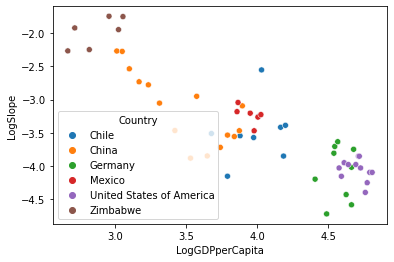

In [19]:
df_diffs_nonzero['LogGDPperCapita'] = np.log10(df_diffs_nonzero['GDPperCapita'])
df_diffs_nonzero['LogSlope'] = np.log10(df_diffs_nonzero['slope'])
sns.scatterplot(x='LogGDPperCapita', y='LogSlope', data=df_diffs_nonzero, hue='Country')

LogSlope = -0.9974230824475272*LogGDPperCapita + 0.5421275166178446


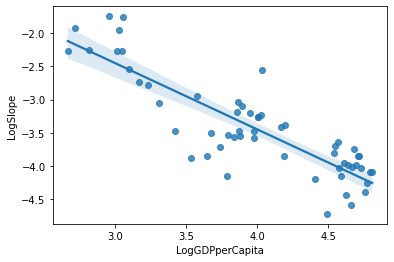

In [20]:
sns.regplot(x='LogGDPperCapita', y='LogSlope', data=df_diffs_nonzero)
m, b = np.polyfit(df_diffs_nonzero['LogGDPperCapita'], df_diffs_nonzero['LogSlope'], 1)
print("LogSlope = {}*LogGDPperCapita + {}".format(m,b))

So we have found

In [32]:
print("LogSlope = {}*LogGDPperCapita + {}".format(m,b))
B = m
A = 10**b
print("Slope = {}*GDPperCapita^{}".format(A,B))
print("dy/dx=A*x^B")
print("y = A/(B+1) * x^(B+1) + C")
print("Or, since B is so close to -1, we might have a natural log.")
coefficient = A/(B+1)
exponent = B+1
print("So either LifeExpectancy = {} * GDPperCapita^{} + C".format(coefficient, exponent))
print("Or LifeExpectancy = A*ln(GDPperCapita) + C")

LogSlope = -0.9974230824475272*LogGDPperCapita + 0.5421275166178446
Slope = 3.484396081109827*GDPperCapita^-0.9974230824475272
dy/dx=A*x^B
y = A/(B+1) * x^(B+1) + C
Or, since B is so close to -1, we might have a natural log.
So either LifeExpectancy = 1352.1566018929136 * GDPperCapita^0.0025769175524728016 + C
Or LifeExpectancy = A*ln(GDPperCapita) + C


We have found the relationship between life expectancy and GDP per capita. The coefficient and the exponent seem to be the same for every country in the dataset. The differences are summed up in the offset C. Let's find out what C needs to be for each country.

In [73]:
from scipy.optimize import curve_fit
 
def objective(x, a, b, c):
    return a * np.log(x-b) + c

def fitData(df_country):
    xarray = df_country['GDPperCapita'].to_numpy()
    yarray = df_country['Life expectancy at birth (years)'].to_numpy()
    guess = [3.0, -1000.0, 50.0]
    lowerbounds = [0.0, -100000.0, 0.0]
    upperbounds = [10.0, np.min(xarray), 100.0]
    pars, cov = curve_fit(objective, xarray, yarray, p0=guess, bounds=(lowerbounds, upperbounds))
    plt.scatter(xarray, yarray)
    plt.title(df_country['Country'].unique()[0])

    x_line = np.arange(min(xarray), max(xarray), 1)
    y_line = objective(x_line, pars[0], pars[1], pars[2])
    plt.plot(x_line, y_line, '--', color='red')
    plt.show()
    print("LifeExpectancy = {A}*ln(GDPperCapita-{B}) + {C}".format(A=pars[0], B=pars[1], C=pars[2]))
    #print("Cov = {}".format(cov))
    return x_line, y_line

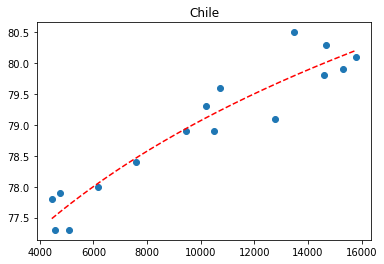

LifeExpectancy = 3.5868926422128258*ln(GDPperCapita--5540.560098330886) + 44.45178266106314


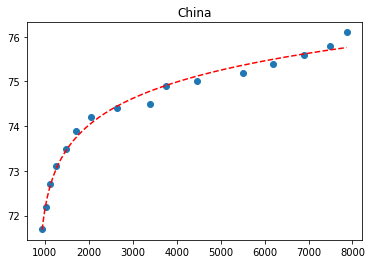

LifeExpectancy = 0.9648408013237485*ln(GDPperCapita-835.9034136999135) + 67.21158026180235


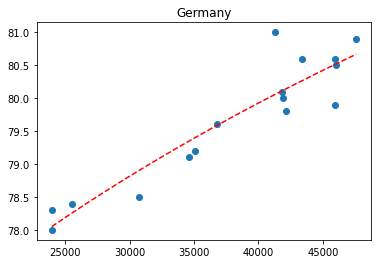

LifeExpectancy = 7.1668827820691865*ln(GDPperCapita--29705.266423697813) + 1.202788225048845e-13


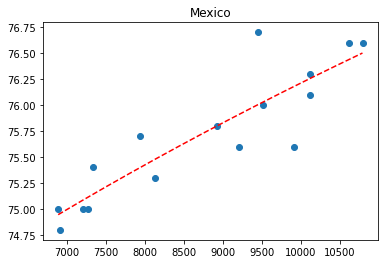

LifeExpectancy = 7.080195799524328*ln(GDPperCapita--8994.860846499334) + 6.458001596810386


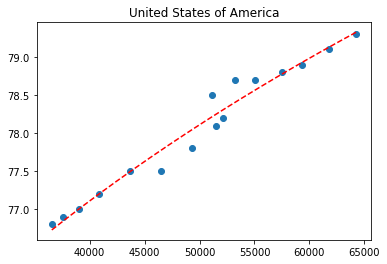

LifeExpectancy = 6.961411934723477*ln(GDPperCapita--24644.72369559194) + 3.6700990196324445e-12


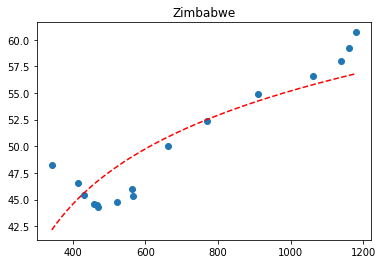

LifeExpectancy = 8.216034395095706*ln(GDPperCapita-172.80625191039923) + 8.75791333648064e-14


In [75]:
x_lines = np.empty(len(list_of_countries),dtype=object)
y_lines = np.empty(len(list_of_countries),dtype=object)
for i in range(len(list_of_countries)):
    df_country = dfs_countries[i]
    x_line, y_line = fitData(df_country)
    x_lines[i] = x_line
    y_lines[i] = y_line

The natural logarithm gives a pretty good description of the data for most of the countries in the dataset. Zimbabwe is not very well described, but it's GDP is so low that other factors may have a much bigger impact on the shape.

Here's my interpretation of the fit function. I think the natural logarithm arises because, no matter how hard we try, we can't live forever. As we push our life expectancy ever higher, it gets harder and harder to raise it by just a little bit more.
The parameter a, the coefficient of the logarithm, is a scaling factor describing how much the changes in GDP are able to affect the life expectancy. If the parameter is small, then that means that an increase in GDP does not improve the health and safety of people in that country as significantly as it does in other countries. This would indicate that the money is not going to the people, or the country has an underdeveloped healthcare system so that an increase in income makes little difference in overall health.
The parameter b, the offset in GDP per capita, tells us at what level of GDP per capita it begins to have a positive effect on life expectancy. This is probably related to wealth not being left in the hands of the general population due to low wages or high taxes.
The parameter c is the offset in life expectancy. It tells us how much of the life expectancy is independent of the GDP.
Due to the scarcity of the data in the dataset, it is hard to draw significant conclusions about the parameters of each country. Several different configurations of the parameters could create a believable fit to the data, especially those which appear to be straight lines. It is hard to get a good estimate of the offset in life expectancy (c) and the offset in GDP (b) with seeing where the line "turns on" as we do with China's data. The natural logarithm function that I came up with is good, but the analysis requires more data to draw conclusions about the parameters for each country.

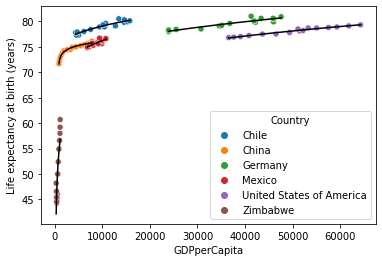

In [78]:
sns.scatterplot(x='GDPperCapita', y='Life expectancy at birth (years)', data=df, hue='Country')
for i in range(len(list_of_countries)):
    plt.plot(x_lines[i], y_lines[i], '-', color='black')
plt.show()